# City of Boston 311 Data Exploration

Digging into what data is on 311, Service RequestsCity Services
https://data.cityofboston.gov/City-Services/311-Service-Requests/awu8-dc52

In [31]:
import pandas as pd
import pandas_profiling as pdp
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline


ERROR:root:Line magic function `%inline` not found.


# Load Data

https://data.cityofboston.gov/City-Services/311-Service-Requests/awu8-dc52

In [2]:
df=pd.read_csv("../../data/311__Service_Requests.csv", parse_dates=True, encoding='UTF-8', infer_datetime_format=True)

In [3]:
df.head()

,CASE_ENQUIRY_ID,OPEN_DT,TARGET_DT,CLOSED_DT,OnTime_Status,CASE_STATUS,CLOSURE_REASON,CASE_TITLE,SUBJECT,REASON,...,precinct,land_usage,LOCATION_STREET_NAME,LOCATION_ZIPCODE,Property_Type,Property_ID,LATITUDE,LONGITUDE,Source,Geocoded_Location
0,101000493034,10/16/2012 02:45:25 PM,10/18/2012 02:45:24 PM,10/17/2012 07:36:59 AM,ONTIME,Closed,Case Resolved,Sticker Request,Public Works Department,Recycling,...,1602,NaN,36 Park St,2122.0,NaN,NaN,42.3011,-71.0543,Self Service,NaN
1,101000362571,12/09/2011 04:04:25 PM,NaN,12/19/2011 11:50:23 PM,ONTIME,Closed,NaN,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,...,2210,NaN,89 Turner St,2135.0,NaN,NaN,42.3523,-71.1618,Self Service,NaN
2,101000301154,07/13/2011 11:40:05 AM,07/15/2011 11:40:05 AM,02/09/2012 04:16:40 PM,OVERDUE,Closed,NaN,Work w/out Permit,Inspectional Services,Building,...,1906,NaN,626 Centre St,2130.0,NaN,NaN,42.3139,-71.1138,Constituent Call,NaN
3,101000339191,10/06/2011 02:59:01 PM,10/13/2011 02:59:01 PM,10/12/2011 08:41:41 AM,ONTIME,Closed,Case Resolved,Contractor Complaints,Public Works Department,Highway Maintenance,...,2213,NaN,50-52 Burton St,2135.0,NaN,NaN,42.3550,-71.1721,Constituent Call,NaN
4,101000409680,04/18/2012 11:39:15 AM,10/15/2012 11:39:15 AM,04/19/2012 09:23:17 AM,ONTIME,Closed,Case Resolved,Upgrade Existing Lighting,Public Works Department,Street Lights,...,0303,NaN,204 Hanover St,2113.0,NaN,NaN,42.3628,-71.0557,Maximo Integration,NaN


In [4]:
df.columns

Index(['CASE_ENQUIRY_ID', 'OPEN_DT', 'TARGET_DT', 'CLOSED_DT', 'OnTime_Status',
       'CASE_STATUS', 'CLOSURE_REASON', 'CASE_TITLE', 'SUBJECT', 'REASON',
       'TYPE', 'QUEUE', 'Department', 'SubmittedPhoto', 'ClosedPhoto',
       'Location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'land_usage', 'LOCATION_STREET_NAME',
       'LOCATION_ZIPCODE', 'Property_Type', 'Property_ID', 'LATITUDE',
       'LONGITUDE', 'Source', 'Geocoded_Location'],
      dtype='object')

In [7]:
df.describe()

,CASE_ENQUIRY_ID,fire_district,city_council_district,neighborhood_services_district,land_usage,LOCATION_ZIPCODE,Property_Type,Property_ID,LATITUDE,LONGITUDE,Geocoded_Location
count,9.739930e+05,930126.000000,933309.000000,933302.000000,0.0,743564.000000,0.0,0.0,973993.000000,973993.000000,0.0
mean,1.010013e+11,7.129086,4.646184,8.910798,NaN,2127.357854,NaN,NaN,42.326995,-71.083624,NaN
std,5.355242e+05,3.260521,2.575545,4.204147,NaN,18.074524,NaN,NaN,0.034722,0.035737,NaN
min,1.010003e+11,1.000000,0.000000,0.000000,NaN,2026.000000,NaN,NaN,42.230200,-71.185400,NaN
25%,1.010009e+11,4.000000,2.000000,5.000000,NaN,2120.000000,NaN,NaN,42.296700,-71.107600,NaN
50%,1.010013e+11,7.000000,5.000000,10.000000,NaN,2126.000000,NaN,NaN,42.334600,-71.073300,NaN
75%,1.010018e+11,9.000000,7.000000,13.000000,NaN,2131.000000,NaN,NaN,42.359400,-71.058700,NaN
max,1.010021e+11,12.000000,9.000000,15.000000,NaN,2467.000000,NaN,NaN,42.395200,-70.994900,NaN


In [12]:
# noisey_cols = ['LATITUDE', 'OPEN_DT', 'TARGET_DT','CLOSED_DT', 'CASE_ENQUIRY_ID', 'Location', 'LOCATION_STREET_NAME', 'Property_ID', 'LATITUDE','LONGITUDE', 'LOCATION_ZIPCODE', ]
# pdp.ProfileReport(df[df.columns.difference(noisey_cols)])
important_cols = ['OnTime_Status',
       'CASE_STATUS', 'CLOSURE_REASON', 'CASE_TITLE', 'SUBJECT', 'REASON',
       'TYPE', 'QUEUE', 'Department', 'SubmittedPhoto', 'ClosedPhoto'
       , 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'land_usage', 'Property_Type', 'Source', 'Geocoded_Location']
profile = pdp.ProfileReport(df[important_cols])

/opt/conda/lib/python3.5/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}
/opt/conda/lib/python3.5/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}
/opt/conda/lib/python3.5/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}


In [28]:
profile.to_file(outputfile="full_profile.html")
profile

Number of variables,23
Number of observations,973993
Total Missing (%),23.3%
Total size in memory,170.9 MiB
Average record size in memory,184.0 B
Numeric,2
Categorical,17
Date,0
Text (Unique),0
Rejected,4
Distinct count,2


In [308]:
potdf = df.loc[df['TYPE'].str.contains('Pot')]
potdf.head()


,CASE_ENQUIRY_ID,OPEN_DT,TARGET_DT,CLOSED_DT,OnTime_Status,CASE_STATUS,CLOSURE_REASON,CASE_TITLE,SUBJECT,REASON,...,precinct,land_usage,LOCATION_STREET_NAME,LOCATION_ZIPCODE,Property_Type,Property_ID,LATITUDE,LONGITUDE,Source,Geocoded_Location
51,101001001808,01/10/2014 04:29:24 AM,NaN,01/10/2014 04:29:25 AM,ONTIME,Closed,NaN,Pothole Repair (Internal),Public Works Department,Highway Maintenance,...,1404,NaN,INTERSECTION Eldon St & Washington St,NaN,NaN,NaN,42.3029,-71.0782,Employee Generated,NaN
67,101001014109,01/29/2014 08:38:15 AM,NaN,01/29/2014 08:38:15 AM,ONTIME,Closed,NaN,Pothole Repair (Internal),Public Works Department,Highway Maintenance,...,0103,NaN,172-176 Sumner St,2128.0,NaN,NaN,42.3694,-71.0406,Employee Generated,NaN
89,101000316327,08/19/2011 11:36:18 AM,NaN,08/19/2011 11:36:19 AM,ONTIME,Closed,NaN,Pothole Repair (Internal),Public Works Department,Highway Maintenance,...,1803,NaN,143 Colorado St,2126.0,NaN,NaN,42.2755,-71.1018,Employee Generated,NaN
92,101001007126,01/16/2014 03:17:00 PM,NaN,01/16/2014 03:17:01 PM,ONTIME,Closed,NaN,Pothole Repair (Internal),Public Works Department,Highway Maintenance,...,0110,NaN,62A-62 Prescott St,2128.0,NaN,NaN,42.3789,-71.0295,Employee Generated,NaN
94,101000395943,03/16/2012 09:47:44 AM,NaN,03/16/2012 09:47:44 AM,ONTIME,Closed,NaN,Pothole Repair (Internal),Public Works Department,Highway Maintenance,...,0302,NaN,INTERSECTION Commercial St & Foster St,NaN,NaN,NaN,42.3677,-71.0540,Employee Generated,NaN


In [25]:
pothole_profile = pdp.ProfileReport(potdf[important_cols])

/opt/conda/lib/python3.5/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}
/opt/conda/lib/python3.5/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}
/opt/conda/lib/python3.5/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}


In [27]:
pothole_profile.to_file(outputfile="pothole_profile.html")

pothole_profile


Number of variables,24
Number of observations,77677
Total Missing (%),21.7%
Total size in memory,14.2 MiB
Average record size in memory,192.0 B
Numeric,3
Categorical,17
Date,0
Text (Unique),0
Rejected,4
Distinct count,2


# Setup Data Partitions

### Citizen Reported DF

### City Worker Reported DF

In [351]:
# Citizen Reported DF

non_employee_source = ['Citizens Connect App','Constituent Call', 'Self Service', 'Twitter']
citizen_df = potdf.loc[potdf['Source'].isin(non_employee_source) ]

citizen_df.head(1)['Source']


137    Citizens Connect App
Name: Source, dtype: object

In [350]:
# City Worker Reported DF

criterion = lambda row: row['Source'] not in non_employee_source
worker_df = potdf[potdf.apply(criterion, axis=1)]

worker_df.head(1)['Source']

51    Employee Generated
Name: Source, dtype: object

# Potholes by Neigborhood

In [372]:
# helper methods
import collections

def graph_pots(dd, t=None, yl=None, xl=None):
    l = range(len(dd.keys()))
    plt.bar(l, dd.values(), align='center')
    plt.xticks(l, dd.keys(), rotation='vertical')
    plt.ylabel(yl)
    plt.xlabel(xl)
    plt.title(t)
    plt.show()
    
def graph_col(col_df, col_name):
    return graph_pots(
        collections.Counter(col_df[col_name].dropna())
        )

def potholes_by(hole_df, place, df_name):
    return graph_pots(
        collections.Counter(hole_df[place].dropna()),
        yl='Closed Potholes',
        xl='Places',
        t="Potholes by {} Reported By {}".format(place, df_name)
        )

In [373]:
df.index

RangeIndex(start=0, stop=973993, step=1)

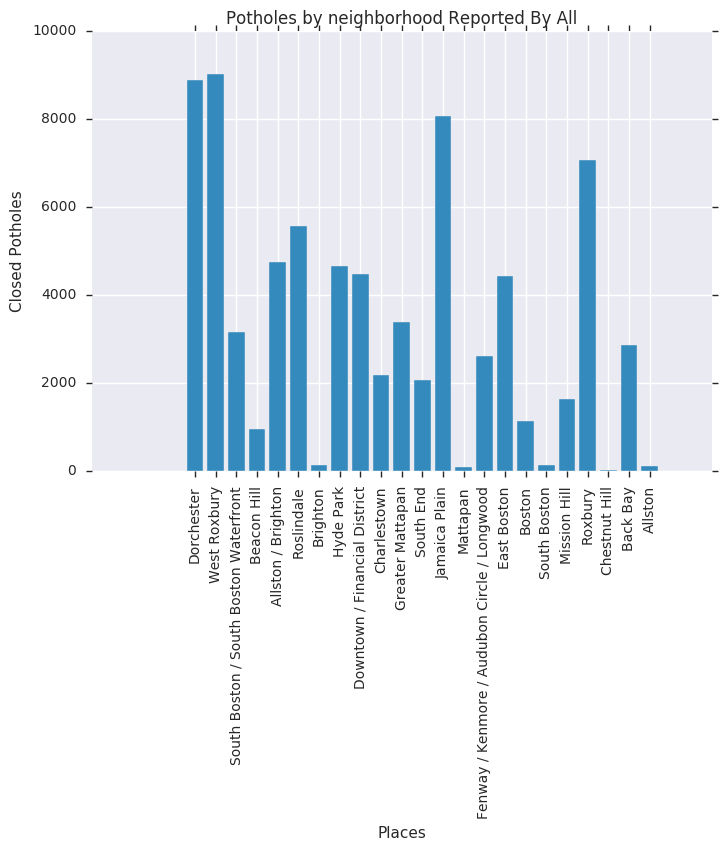

In [376]:

potholes_by(potdf, 'neighborhood', 'All')

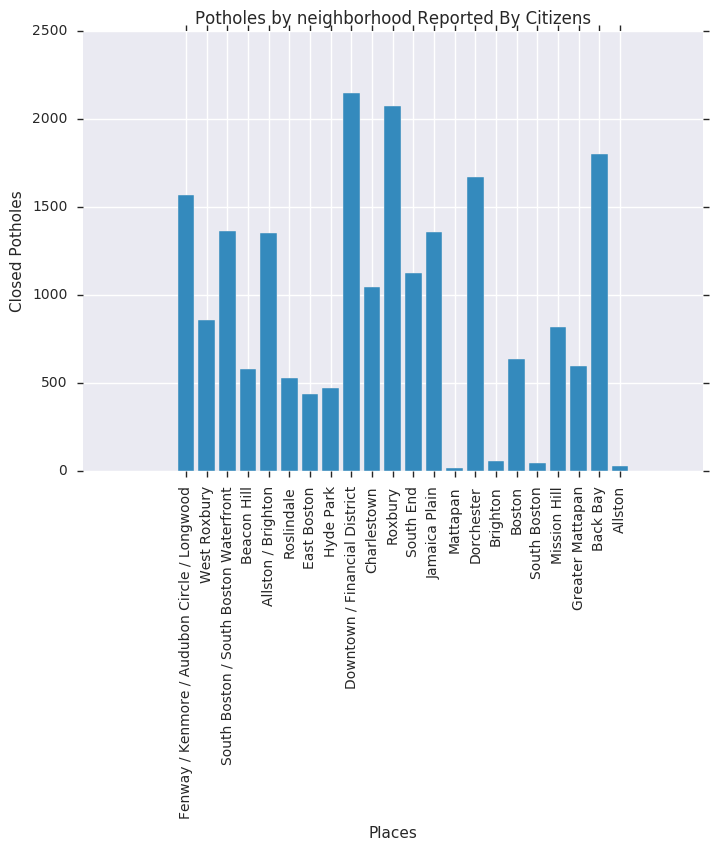

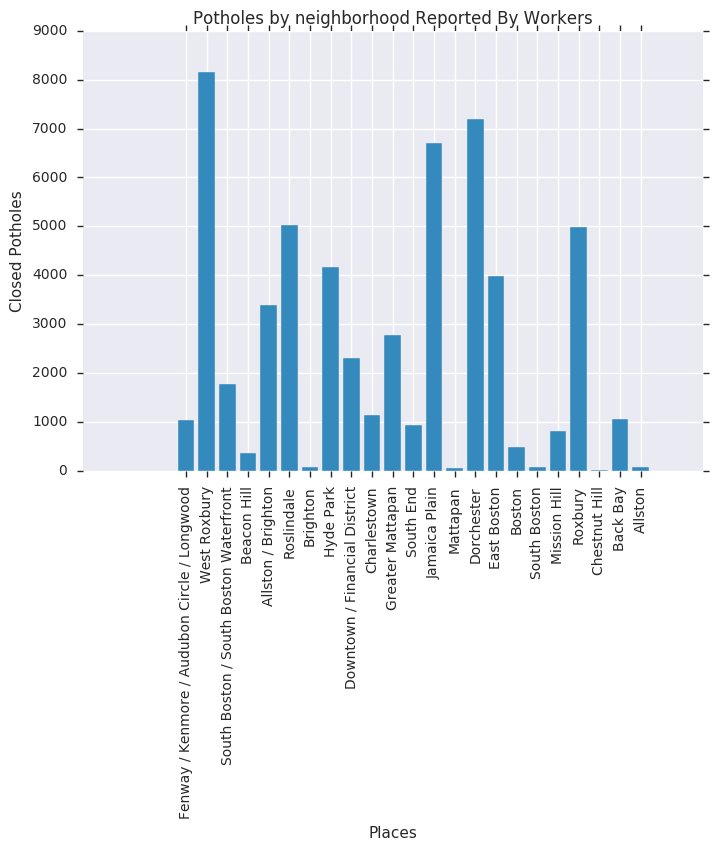

In [377]:
potholes_by(citizen_df, 'neighborhood', 'Citizens')
potholes_by(worker_df, 'neighborhood', 'Workers')

# Potholes by City Council District

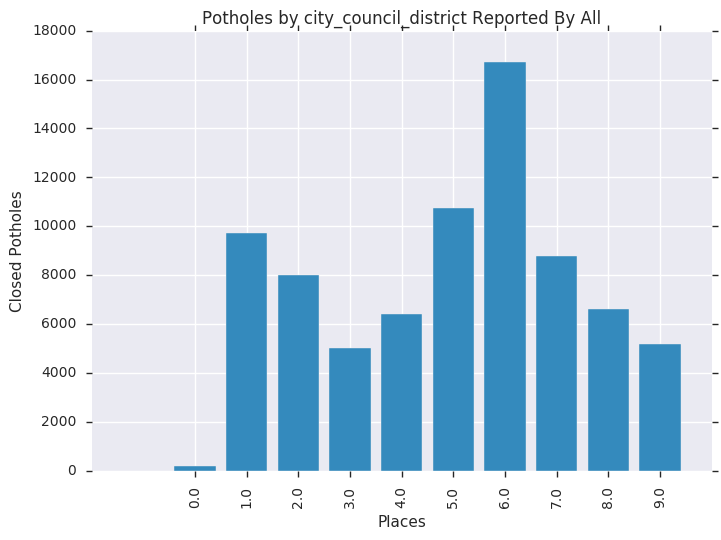

In [379]:
potholes_by(potdf, 'city_council_district', 'All')

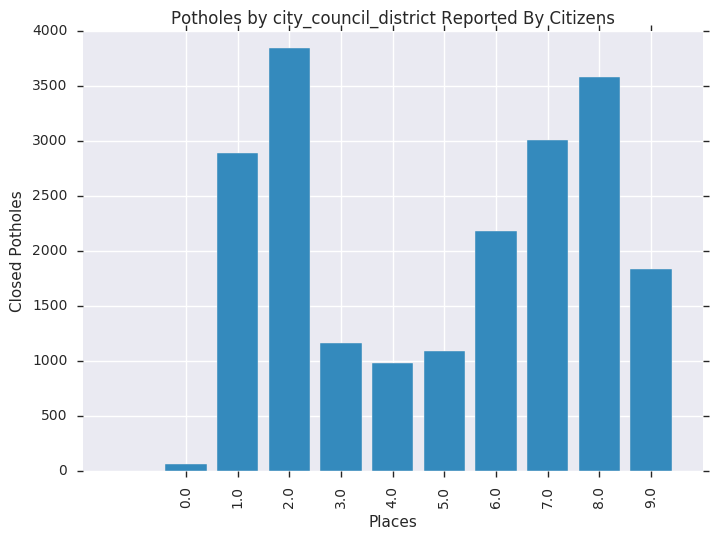

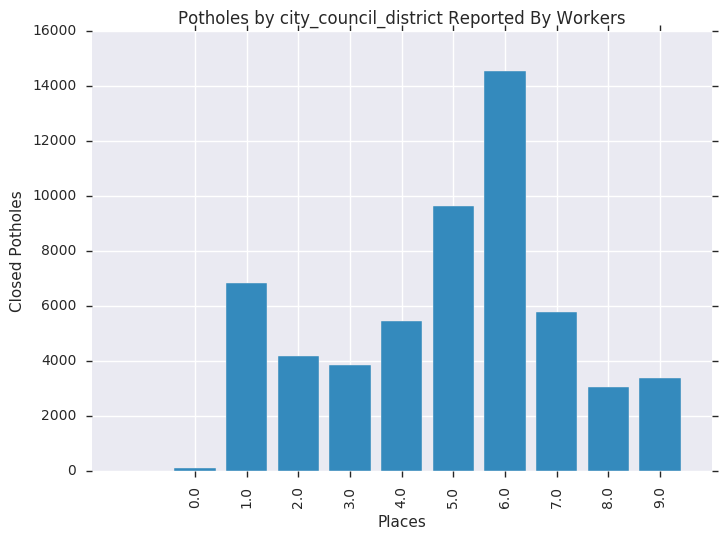

In [381]:
potholes_by(citizen_df, 'city_council_district', 'Citizens')
potholes_by(worker_df, 'city_council_district', 'Workers')

# Age of Potholes

'OPEN_DT', 'TARGET_DT', 'CLOSED_DT'

`age =  DateClosed('CLOSED_DT') - DateCreated('OPEN_DT')`

`expected_age = TargetDate('TARGET_DT') - DateCreate('OPEN_DT') `

`performance = expected_age - age`

In [384]:


potdf['age'] =  pd.to_datetime(potdf['CLOSED_DT']) - pd.to_datetime(potdf['OPEN_DT'])
potdf['expected_age'] =  pd.to_datetime(potdf['TARGET_DT']) - pd.to_datetime(potdf['OPEN_DT'])
potdf['performance'] = potdf['expected_age'] - potdf['age'] 


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [382]:
closedpotdf = potdf['age'].dropna()
potdf['age_in_days'] = closedpotdf.apply(lambda x: x.days if isinstance(good, pd.Timedelta) else 0)
# potdf['age_in_days'].dropna()

KeyError: 'age'

In [240]:
import collections

# df = df[df.line_race != 0]

dd = collections.Counter(potdf['neighborhood'].dropna())
age_dd = collections.Counter(potdf['age_in_days'].dropna())
age_dd
# # plt.bar(dd.values(), dd.keys())
# l = range(len(60)
plt.hist(x=potdf['age_in_days'], data=potdf['neighborhood'])
# # plt.xticks(l, age_dd.keys(), rotation='vertical')
# plt.show()

AttributeError: max must be larger than min in range parameter.

In [220]:
potdf['age_in_days'].describe()

count    75510.000000
mean         2.138803
std         20.836784
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1378.000000
Name: age_in_days, dtype: float64

In [196]:
# print(potdf.age)
bad = potdf.age[973808]
# print('fuck') if bad.second.is_integer() else print('nope')

    
# fff = bad.second
# bad == pd.Timedelta('NaT')
# pd.notnull(bad)
bad.day
isinstance(bad, pd.Timedelta)

False

In [184]:
good = potdf.age[51]
isinstance(good, pd.Timedelta)
# good.day

True

In [248]:
p = potdf['age_in_days'].plot.hist()
plt.show()

TypeError: draw_wrapper() missing 1 required positional argument: 'renderer'

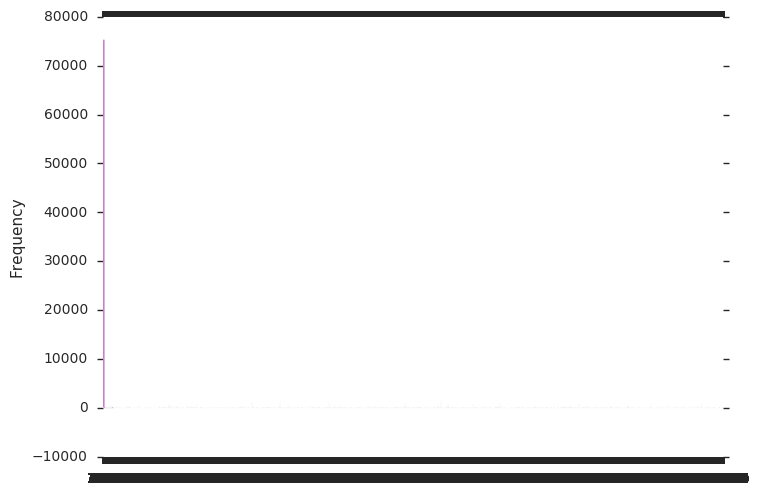

In [249]:
plt.show()

In [258]:
from collections import defaultdict
age_map = defaultdict(int) 

for age in potdf['age_in_days'].iteritems():
    age_map[age[1]] += 1

In [259]:
age_map

defaultdict(int,
            {0.0: 60781,
             1.0: 5726,
             2.0: 2267,
             3.0: 1461,
             4.0: 849,
             5.0: 611,
             6.0: 462,
             7.0: 279,
             8.0: 188,
             9.0: 151,
             10.0: 151,
             11.0: 135,
             12.0: 112,
             13.0: 100,
             14.0: 79,
             15.0: 70,
             16.0: 62,
             17.0: 49,
             18.0: 65,
             19.0: 49,
             20.0: 58,
             21.0: 53,
             22.0: 23,
             23.0: 25,
             24.0: 38,
             25.0: 28,
             26.0: 36,
             27.0: 34,
             28.0: 35,
             29.0: 21,
             30.0: 24,
             nan: 1,
             32.0: 20,
             33.0: 21,
             34.0: 17,
             35.0: 13,
             36.0: 13,
             37.0: 11,
             38.0: 8,
             39.0: 18,
             40.0: 25,
             41.0: 15,
           

In [262]:
non_employee_source = ['Citizens Connect App','Constituent Call', 'Self Service', 'Twitter']
citizens_df = potdf.loc[(potdf['CASE_STATUS'] == 'Closed' ) &(potdf['Source'].isin(non_employee_source)) ]
citizens_df

,CASE_ENQUIRY_ID,OPEN_DT,TARGET_DT,CLOSED_DT,OnTime_Status,CASE_STATUS,CLOSURE_REASON,CASE_TITLE,SUBJECT,REASON,...,Property_Type,Property_ID,LATITUDE,LONGITUDE,Source,Geocoded_Location,age,expected_age,performance,age_in_days
137,101001943833,11/02/2016 09:13:00 AM,11/03/2016 09:13:00 AM,11/08/2016 01:41:56 PM,OVERDUE,Closed,Case Resolved,Request for Pothole Repair,Public Works Department,Highway Maintenance,...,NaN,NaN,42.3594,-71.0587,Citizens Connect App,NaN,6 days 04:28:56,1 days 00:00:00,-6 days +19:31:04,6.0
147,101001995955,01/25/2017 08:23:12 AM,01/26/2017 08:30:00 AM,01/26/2017 12:37:23 PM,OVERDUE,Closed,Case Invalid,Request for Pothole Repair,Public Works Department,Highway Maintenance,...,NaN,NaN,42.3485,-71.0680,Citizens Connect App,NaN,1 days 04:14:11,1 days 00:06:48,-1 days +19:52:37,1.0
257,101002012985,02/14/2017 11:51:00 AM,02/15/2017 11:51:27 AM,02/27/2017 01:00:03 PM,OVERDUE,Closed,Case Noted,Request for Pothole Repair,Public Works Department,Highway Maintenance,...,NaN,NaN,42.3594,-71.0587,Constituent Call,NaN,13 days 01:09:03,1 days 00:00:27,-13 days +22:51:24,13.0
393,101001346580,04/01/2015 09:31:49 AM,04/02/2015 09:31:49 AM,04/01/2015 11:30:44 AM,ONTIME,Closed,Case Resolved,Request for Pothole Repair,Public Works Department,Highway Maintenance,...,NaN,NaN,42.3439,-71.0567,Citizens Connect App,NaN,0 days 01:58:55,1 days 00:00:00,0 days 22:01:05,0.0
413,101000367313,12/23/2011 08:09:26 AM,12/27/2011 08:09:26 AM,12/23/2011 10:24:53 AM,ONTIME,Closed,Case Resolved,Request for Pothole Repair,Public Works Department,Highway Maintenance,...,NaN,NaN,42.3284,-71.0898,Citizens Connect App,NaN,0 days 02:15:27,4 days 00:00:00,3 days 21:44:33,0.0
524,101001086086,05/10/2014 08:48:09 AM,05/14/2014 08:30:00 AM,05/12/2014 10:38:01 AM,ONTIME,Closed,Case Invalid,Request for Pothole Repair,Public Works Department,Highway Maintenance,...,NaN,NaN,42.2647,-71.1073,Constituent Call,NaN,2 days 01:49:52,3 days 23:41:51,1 days 21:51:59,2.0
582,101001743667,03/10/2016 09:36:00 AM,03/11/2016 09:36:12 AM,03/11/2016 09:29:44 AM,ONTIME,Closed,Case Resolved,Request for Pothole Repair,Public Works Department,Highway Maintenance,...,NaN,NaN,42.3594,-71.0587,Constituent Call,NaN,0 days 23:53:44,1 days 00:00:12,0 days 00:06:28,0.0
609,101001960006,11/28/2016 03:29:00 PM,11/29/2016 03:29:06 PM,11/29/2016 10:08:27 AM,ONTIME,Closed,Case Resolved,Request for Pothole Repair,Public Works Department,Highway Maintenance,...,NaN,NaN,42.2711,-71.0905,Constituent Call,NaN,0 days 18:39:27,1 days 00:00:06,0 days 05:20:39,0.0
612,101001321073,03/02/2015 10:26:26 AM,03/03/2015 10:26:26 AM,03/04/2015 08:36:14 AM,OVERDUE,Closed,Case Noted,Request for Pothole Repair,Public Works Department,Highway Maintenance,...,NaN,NaN,42.2917,-71.1347,Constituent Call,NaN,1 days 22:09:48,1 days 00:00:00,-1 days +01:50:12,1.0
756,101001022791,02/10/2014 09:21:14 AM,02/12/2014 09:21:14 AM,02/11/2014 01:29:36 PM,ONTIME,Closed,Case Resolved,Request for Pothole Repair,Public Works Department,Highway Maintenance,...,NaN,NaN,42.3668,-71.0536,Constituent Call,NaN,1 days 04:08:22,2 days 00:00:00,0 days 19:51:38,1.0


# Picking arbitray cut off


In [264]:
citizens_age = defaultdict(int) 

for age in citizens_df['age_in_days'].iteritems():
    citizens_age[age[1]] += 1
    
citizens_age    

defaultdict(int,
            {0.0: 8874,
             1.0: 3333,
             2.0: 1795,
             3.0: 1113,
             4.0: 652,
             5.0: 438,
             6.0: 359,
             7.0: 204,
             8.0: 144,
             9.0: 109,
             10.0: 117,
             11.0: 112,
             12.0: 94,
             13.0: 83,
             14.0: 61,
             15.0: 60,
             16.0: 47,
             17.0: 38,
             18.0: 47,
             19.0: 42,
             20.0: 51,
             21.0: 35,
             22.0: 22,
             23.0: 23,
             24.0: 21,
             25.0: 22,
             26.0: 31,
             27.0: 33,
             28.0: 30,
             29.0: 18,
             30.0: 22,
             31.0: 24,
             32.0: 16,
             33.0: 17,
             34.0: 13,
             35.0: 10,
             36.0: 13,
             37.0: 9,
             38.0: 8,
             39.0: 18,
             40.0: 24,
             41.0: 15,
             

In [279]:
cumulative_days =  defaultdict(int) 
seen = []
for k in citizens_age:
    seen.append(k)
    for older in seen:
        cumulative_days[k] += citizens_age[older]

cumulative_days  

defaultdict(int,
            {0.0: 8874,
             1.0: 12207,
             2.0: 14002,
             3.0: 15115,
             4.0: 15767,
             5.0: 16205,
             6.0: 16564,
             7.0: 16768,
             8.0: 16912,
             9.0: 17021,
             10.0: 17138,
             11.0: 17250,
             12.0: 17344,
             13.0: 17427,
             14.0: 17488,
             15.0: 17548,
             16.0: 17595,
             17.0: 17633,
             18.0: 17680,
             19.0: 17722,
             20.0: 17773,
             21.0: 17808,
             22.0: 17830,
             23.0: 17853,
             24.0: 17874,
             25.0: 17896,
             26.0: 17927,
             27.0: 17960,
             28.0: 17990,
             29.0: 18008,
             30.0: 18030,
             31.0: 18658,
             32.0: 18047,
             33.0: 18064,
             34.0: 18077,
             35.0: 18087,
             36.0: 18100,
             37.0: 18109,
      

In [285]:
n = citizens_df.shape[0]
print("N examples: "+str(n))

N examples: 18804


In [286]:
percent_by_day =  defaultdict(int) 
seen = []
for k in cumulative_days:
    percent_by_day[k] = cumulative_days[k]/n

percent_by_day  

defaultdict(int,
            {0.0: 0.47192086790044674,
             1.0: 0.6491703892788768,
             2.0: 0.7446288023824719,
             3.0: 0.8038183365241438,
             4.0: 0.8384918102531377,
             5.0: 0.8617847266539034,
             6.0: 0.8808764092746224,
             7.0: 0.8917251648585407,
             8.0: 0.8993831099766008,
             9.0: 0.9051797489895766,
             10.0: 0.9114018293980004,
             11.0: 0.9173580089342693,
             12.0: 0.9223569453307807,
             13.0: 0.9267708998085513,
             14.0: 0.9300148904488407,
             15.0: 0.933205700914699,
             16.0: 0.9357051691129546,
             17.0: 0.9377260157413316,
             18.0: 0.9402254839395873,
             19.0: 0.9424590512656882,
             20.0: 0.9451712401616678,
             21.0: 0.9470325462667517,
             22.0: 0.9482025101042332,
             23.0: 0.9494256541161455,
             24.0: 0.9505424377791959,
             25.0:

In [287]:
cut_off = 174

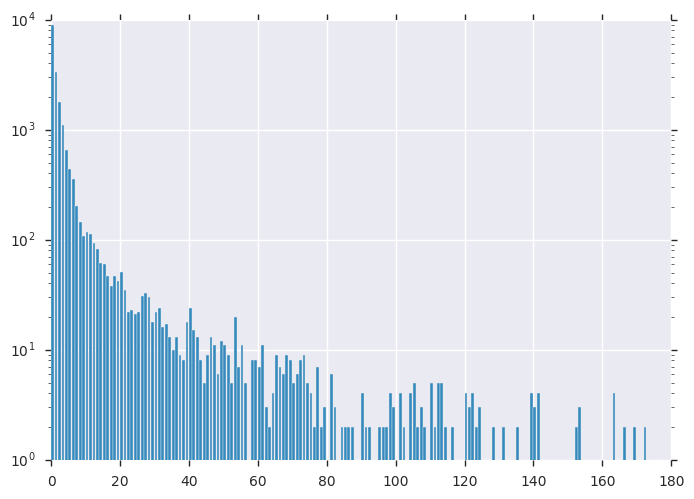

In [307]:
x = []
y = []
for date in range(cut_off):
    x.append(citizens_age[date])
    y.append(date)
plt.bar( y, x, log=True)
plt.show()
